In [2]:
import csv
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns

In [3]:
import os
os.getcwd()
os.listdir(os.curdir)[1]

'store_txn_detail2017.csv'

In [4]:
data = pd.read_csv('store_txn_detail2017.csv', nrows = 10000000)

In [45]:
data.sku.nunique()

11088

In [6]:
data['business_date'] = pd.to_datetime(data['business_date'], format = '%Y-%m-%d')

In [7]:
data['previous_txn_date'] = pd.to_datetime(data['previous_txn_date'], format = '%Y-%m-%d',errors = 'coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 6 columns):
#                    int64
sku                  int64
store_number         int64
business_date        datetime64[ns]
sales_units          int64
previous_txn_date    datetime64[ns]
dtypes: datetime64[ns](2), int64(4)
memory usage: 457.8 MB


In [48]:
df = pd.DataFrame()
df['first_txn'] = data.groupby(['sku'])['business_date'].min()
df['last_txn'] = data.groupby(['sku'])['business_date'].max()
df['total_units_sold'] = data.groupby(['sku'])['sales_units'].sum()
df['txn_dates'] = data.groupby(['sku'])['business_date'].apply(lambda x: list(x))
df['txn_units'] = data.groupby(['sku'])['sales_units'].apply(lambda x: list(x))
df.reset_index(inplace= True)
df['duration'] = (df['last_txn'] - df['first_txn']).dt.days

df.head(10)

,sku,first_txn,last_txn,total_units_sold,txn_dates,txn_units,duration
0,3053632004,2017-08-19,2017-10-01,7,"[2017-09-27 00:00:00, 2017-08-25 00:00:00, 201...","[1, 1, 1, 1, 1, 1, 1]",43
1,3101761600,2017-08-20,2017-08-20,1,[2017-08-20 00:00:00],[1],0
2,3102464000,2017-08-12,2017-08-12,1,[2017-08-12 00:00:00],[1],0
3,3102553300,2017-08-18,2017-08-18,1,[2017-08-18 00:00:00],[1],0
4,3121720600,2017-07-15,2017-07-15,1,[2017-07-15 00:00:00],[1],0
5,3122503800,2017-07-31,2017-07-31,1,[2017-07-31 00:00:00],[1],0
6,3122555200,2017-08-12,2017-08-12,1,[2017-08-12 00:00:00],[1],0
7,3122556100,2017-08-16,2017-08-16,1,[2017-08-16 00:00:00],[1],0
8,3124558300,2017-08-21,2017-09-01,2,"[2017-08-21 00:00:00, 2017-09-01 00:00:00]","[1, 1]",11
9,3170003400,2017-02-09,2017-04-10,3,"[2017-02-09 00:00:00, 2017-02-15 00:00:00, 201...","[1, 1, 1]",60


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

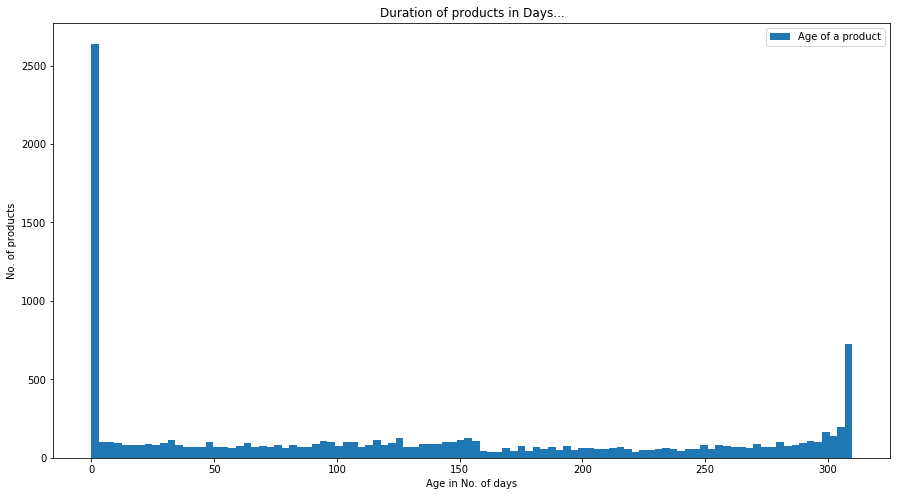

In [22]:
fig = plt.figure(figsize = (15,8))
plt.title('Duration of products in Days...')
plt.hist(df.duration, bins = 100, label = 'Age of a product')
plt.xlabel("Age in No. of days")
plt.ylabel("No. of products")
plt.legend(loc = 'upper right')

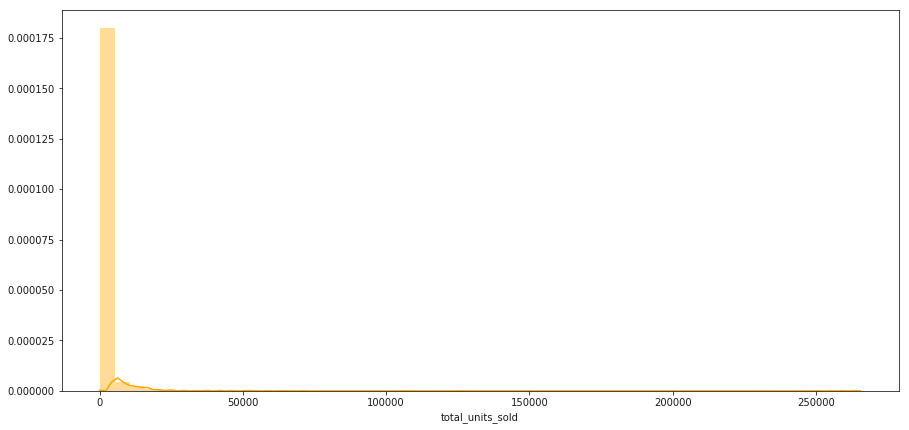

In [35]:
sns.set_color_codes()

fig, ax1 = plt.subplots(1,1,figsize= (15,7))

sns.distplot(df.total_units_sold, ax= ax1, color = 'orange')

In [36]:
len(data.store_number.unique())

1042

In [42]:
data.store_number[data.sku == df.sku[df.total_units_sold].max()]

/home/tatras/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


9970773    325061
9970774    325061
9970775    325061
9970776    325061
9970777    325061
9970778    325061
9970779    325061
9970780    325061
9970781    325061
9970782    325061
9970783    325061
9970784    325061
9970785    325061
9970786    325061
9970787    325061
9970788    325061
9970789    325061
9970790    325061
Name: store_number, dtype: int64

In [32]:
data.business_date[data.sku == data.sku.unique()[0]]

0   2017-09-27
1   2017-08-25
2   2017-08-19
3   2017-09-23
4   2017-08-25
5   2017-08-20
6   2017-10-01
Name: business_date, dtype: datetime64[ns]